In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
Df =pd.read_csv("C:\\Users\\dell\\Downloads\\final_test.csv\\final_test.csv")

In [3]:
Df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [7]:
#Shape 
print("shape of dataset")
print(Df.shape)
print()

shape of dataset
(119734, 4)



In [10]:
# unique feature
print("unique feature of dataset")
print(Df.nunique())


unique feature of dataset
weight    96
age       82
height    23
size       7
dtype: int64


In [12]:
#duplicate
print("duplicates values")
print(Df.duplicated().sum())

duplicates values
92330


In [14]:
#check null values
print(Df.isnull())

        weight    age  height   size
0        False  False   False  False
1        False  False   False  False
2        False  False   False  False
3        False  False   False  False
4        False  False   False  False
...        ...    ...     ...    ...
119729   False  False   False  False
119730   False  False   False  False
119731   False  False   False  False
119732   False  False   False  False
119733   False  False   False  False

[119734 rows x 4 columns]


In [15]:
print(Df.count())

weight    119734
age       119477
height    119404
size      119734
dtype: int64


weight    100.000000
age        99.785358
height     99.724389
size      100.000000
dtype: float64


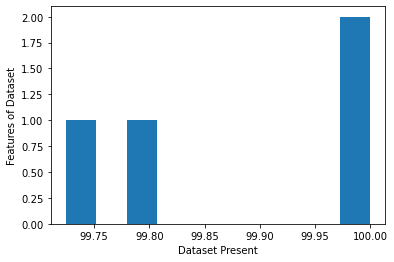

In [16]:
print(Df.count()/Df.isna().count()*100)
x=Df.count()/Df.isna().count()*100
plt.hist(x)
plt.ylabel("Features of Dataset")
plt.xlabel("Dataset Present")
plt.show()

In [17]:
#to check the correlation
print(Df.corr())

          weight       age    height
weight  1.000000  0.067962  0.388350
age     0.067962  1.000000 -0.003044
height  0.388350 -0.003044  1.000000


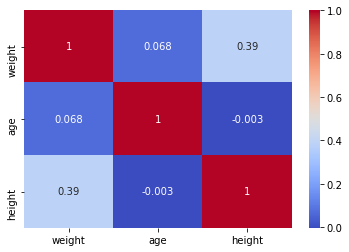

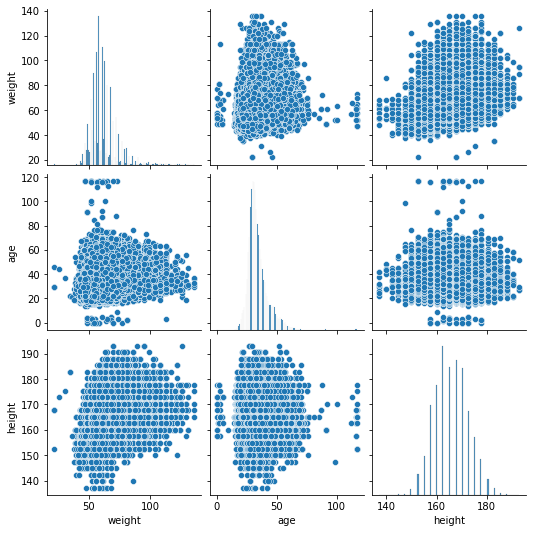

In [20]:
sns.heatmap(Df.corr(),annot=True,cmap="coolwarm")
sns.pairplot(Df)

30.0    8816
31.0    8777
29.0    8358
32.0    8268
28.0    7302
        ... 
92.0       1
88.0       1
1.0        1
9.0        1
85.0       1
Name: age, Length: 82, dtype: int64

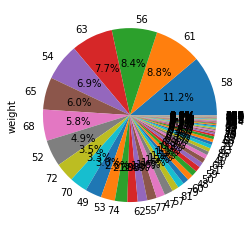

In [21]:
Df['weight'].value_counts().plot.pie(autopct="%.1f%%");
Df['age'].value_counts()

In [54]:
df=Df.dropna()

In [55]:
df.isnull().sum()

weight           0
age              0
height           0
size             0
size_category    0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119153 entries, 0 to 119733
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   weight         119153 non-null  int64  
 1   age            119153 non-null  float64
 2   height         119153 non-null  float64
 3   size           119153 non-null  object 
 4   size_category  119153 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 5.0+ MB


In [57]:
df.head()

,weight,age,height,size,size_category
0,62,28.0,172.72,XL,3
1,59,36.0,167.64,L,0
2,61,34.0,165.10,M,1
3,65,27.0,175.26,L,0
4,62,45.0,172.72,M,1


In [25]:
from matplotlib import style
style.use(style.available[0])

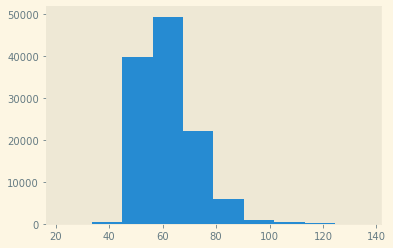

In [58]:
plt.hist(df['weight'],bins=10)
plt.grid()
plt.show()

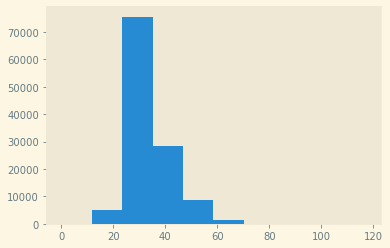

In [59]:
plt.hist(df['age'],bins=10)
plt.grid()
plt.show()

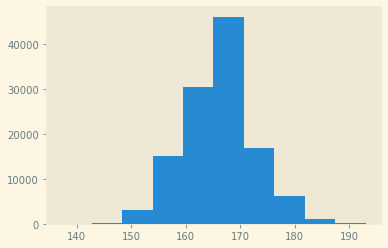

In [60]:
plt.hist(df['height'],bins=10)
plt.grid()
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


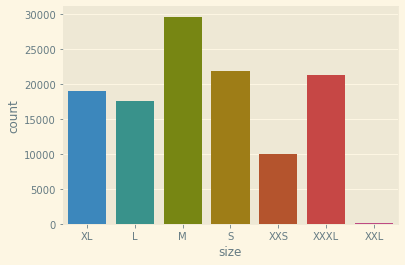

In [61]:
sns.countplot(df['size'])
plt.show()

In [62]:
df['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
LBE = LabelEncoder()

In [64]:
df['size_category'] = LBE.fit_transform(df['size'])

<ipython-input-64-915a8391d767>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_category'] = LBE.fit_transform(df['size'])


In [65]:
df.head()

,weight,age,height,size,size_category
0,62,28.0,172.72,XL,3
1,59,36.0,167.64,L,0
2,61,34.0,165.10,M,1
3,65,27.0,175.26,L,0
4,62,45.0,172.72,M,1


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


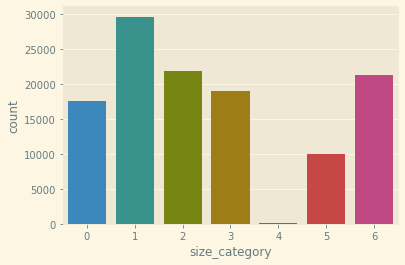

In [66]:
sns.countplot(df['size_category'])
plt.show()

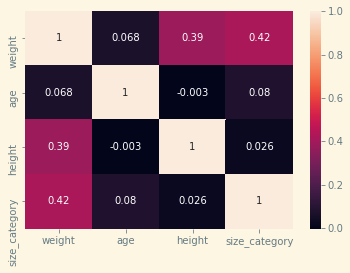

In [67]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler

In [70]:
X = df.iloc[:,:3]

In [41]:
X.head()

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72


In [71]:
y = df['size_category']

In [72]:
y.head()

0    3
1    0
2    1
3    0
4    1
Name: size_category, dtype: int32

In [73]:
sc =StandardScaler()
X = sc.fit_transform(X)

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1)

In [75]:
model = RandomForestClassifier()

In [76]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("Classification Report \n")
print(classification_report(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.36      0.28      0.31      3514
           1       0.48      0.59      0.53      5870
           2       0.49      0.50      0.50      4467
           3       0.44      0.42      0.43      3794
           4       0.00      0.00      0.00        17
           5       0.50      0.41      0.45      1956
           6       0.77      0.75      0.76      4213

    accuracy                           0.51     23831
   macro avg       0.43      0.42      0.42     23831
weighted avg       0.51      0.51      0.51     23831



In [77]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("Classification Report \n")
print(classification_report(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.37      0.28      0.31      3514
           1       0.47      0.59      0.52      5870
           2       0.49      0.50      0.50      4467
           3       0.44      0.43      0.43      3794
           4       0.00      0.00      0.00        17
           5       0.50      0.40      0.45      1956
           6       0.77      0.75      0.76      4213

    accuracy                           0.51     23831
   macro avg       0.43      0.42      0.42     23831
weighted avg       0.51      0.51      0.51     23831



In [78]:
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("Classification Report \n")
print(classification_report(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.38      0.09      0.15      3514
           1       0.46      0.68      0.55      5870
           2       0.50      0.50      0.50      4467
           3       0.43      0.47      0.45      3794
           4       0.00      0.00      0.00        17
           5       0.56      0.37      0.45      1956
           6       0.76      0.79      0.77      4213

    accuracy                           0.52     23831
   macro avg       0.44      0.41      0.41     23831
weighted avg       0.51      0.52      0.49     23831



C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
class_0_df = df[df['size_category']==0]
class_1_df = df[df['size_category']==1]
class_2_df = df[df['size_category']==2]
class_3_df = df[df['size_category']==3]
class_4_df = df[df['size_category']==4]
class_5_df = df[df['size_category']==5]
class_6_df = df[df['size_category']==6]

In [80]:
col = [ class_0_df,
        class_1_df ,
        class_2_df ,
        class_3_df ,
        class_5_df ,
        class_6_df ,
]

In [81]:
for name in col:
    print(name.shape)

(17481, 5)
(29575, 5)
(21829, 5)
(19033, 5)
(9907, 5)
(21259, 5)


In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("Classification Report \n")
print(classification_report(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.36      0.24      0.29      3514
           1       0.47      0.62      0.53      5870
           2       0.49      0.49      0.49      4467
           3       0.43      0.42      0.42      3794
           4       0.00      0.00      0.00        17
           5       0.54      0.40      0.46      1956
           6       0.77      0.77      0.77      4213

    accuracy                           0.51     23831
   macro avg       0.44      0.42      0.42     23831
weighted avg       0.51      0.51      0.51     23831



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
